In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split, ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import RocCurveDisplay
from sklearn.utils import shuffle
from sklearn.model_selection import validation_curve,LearningCurveDisplay,ShuffleSplit

设置随机种子：

In [3]:
seed = 42
np.random.seed(seed)

导入数据集, 设置测试集与训练集比例

In [5]:
df = pd.read_csv('./spam.csv') 
df.info()

x = df['v2'].values
y = df['v1'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.32, random_state=seed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


垃圾邮件比例：

Text(0.5, 1.0, 'Pie chart')

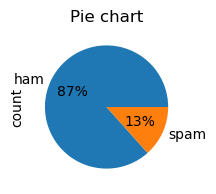

In [8]:
plt.figure(figsize = (2,2))
df['v1'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')
plt.title('Pie chart')

文本特征提取：

In [10]:
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)
x = cv.fit_transform(x)

模型评估与验证：

参数C：


In [12]:
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
x, y = x[indices], y[indices]
train_scores, valid_scores = validation_curve(
    SVC(kernel = 'linear'),x, y, param_name='C',param_range = np.logspace(-7,3,3),
)
print(train_scores)
print(valid_scores)

[[0.8660534  0.8660534  0.86585913 0.86585913 0.86585913]
 [0.98048014 0.97868521 0.97846568 0.98003589 0.97936294]
 [1.         1.         1.         1.         1.        ]]
[[0.86547085 0.86547085 0.86624776 0.86624776 0.86624776]
 [0.97399103 0.9793722  0.97755835 0.96947935 0.97217235]
 [0.97757848 0.98744395 0.98833034 0.98114901 0.98473968]]


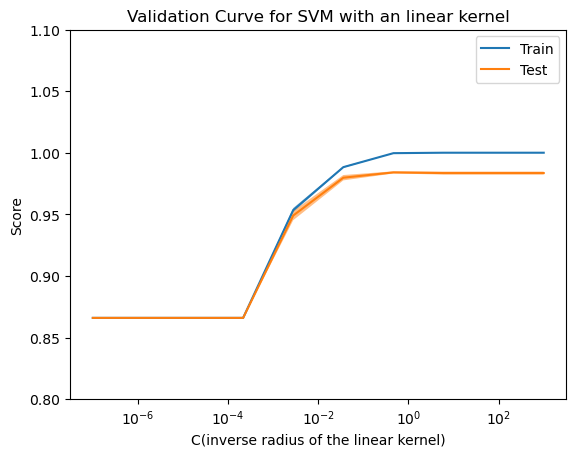

In [13]:
x, y = shuffle(x , y, random_state = seed)
disp = ValidationCurveDisplay.from_estimator(
    SVC(kernel = 'linear'),x, y, param_name='C', param_range=np.logspace(-7, 3, 10),
)
disp.ax_.set_title("Validation Curve for SVM with an linear kernel")
disp.ax_.set_xlabel(r"C(inverse radius of the linear kernel)")
disp.ax_.set_ylim(0.8, 1.1)
plt.show()

参数gamma：

In [15]:
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
x, y = x[indices], y[indices]
train_scores, valid_scores = validation_curve(
    SVC(kernel = 'linear'),x, y, param_name='gamma',param_range = np.logspace(-7,3,3),
)
print(train_scores)
print(valid_scores)

[[0.99977563 0.99977563 0.99977568 0.99977568 1.        ]
 [0.99977563 0.99977563 0.99977568 0.99977568 1.        ]
 [0.99977563 0.99977563 0.99977568 0.99977568 1.        ]]
[[0.98565022 0.98295964 0.98922801 0.98473968 0.98025135]
 [0.98565022 0.98295964 0.98922801 0.98473968 0.98025135]
 [0.98565022 0.98295964 0.98922801 0.98473968 0.98025135]]


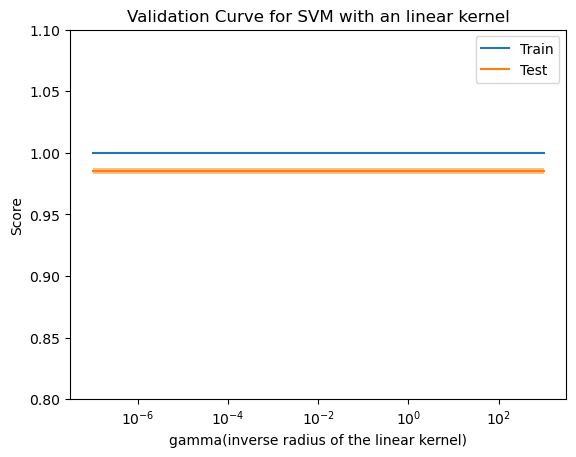

In [16]:
x, y = shuffle(x , y, random_state = seed)
disp = ValidationCurveDisplay.from_estimator(
    SVC(kernel = 'linear'),x, y, param_name='gamma', param_range=np.logspace(-7, 3, 10)
)
disp.ax_.set_title("Validation Curve for SVM with an linear kernel")
disp.ax_.set_xlabel(r"gamma(inverse radius of the linear kernel)")
disp.ax_.set_ylim(0.8, 1.1)
plt.show()

参数tol：

In [18]:
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
x, y = x[indices], y[indices]
train_scores, valid_scores = validation_curve(
    SVC(kernel = 'linear'),x, y, param_name='tol',param_range = np.logspace(-7,3,3),
)
print(train_scores)
print(valid_scores)

[[0.99977563 0.99977563 0.99977568 0.99977568 1.        ]
 [0.99977563 0.99977563 0.99977568 0.99977568 1.        ]
 [0.1339466  0.1339466  0.13414087 0.13414087 0.13414087]]
[[0.98206278 0.98206278 0.98833034 0.98653501 0.98563734]
 [0.98206278 0.98206278 0.98833034 0.98653501 0.98563734]
 [0.13452915 0.13452915 0.13375224 0.13375224 0.13375224]]


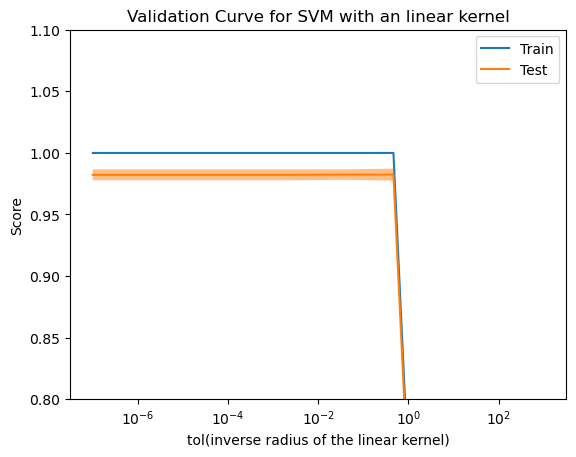

In [19]:
x, y = shuffle(x , y, random_state = seed)
disp = ValidationCurveDisplay.from_estimator(
    SVC(kernel = 'linear'),x, y, param_name='tol', param_range=np.logspace(-7, 3, 10)
)
disp.ax_.set_title("Validation Curve for SVM with an linear kernel")
disp.ax_.set_xlabel(r"tol(inverse radius of the linear kernel)")
disp.ax_.set_ylim(0.8, 1.1)
plt.show()

设置模型参数：

In [21]:
model = SVC(kernel='linear',C=5,gamma=0.5,tol=1e-5,random_state = seed) 
model.fit(x_train, y_train)

SVC(C=5, gamma=0.5, kernel='linear', random_state=42, tol=1e-05)

In [22]:
train_score = model.score(x_train,y_train)
test_score = model.score(x_test, y_test)
print("train score:", train_score)
print("test score:", test_score)

train score: 1.0
test score: 0.9809417040358744


学习曲线：

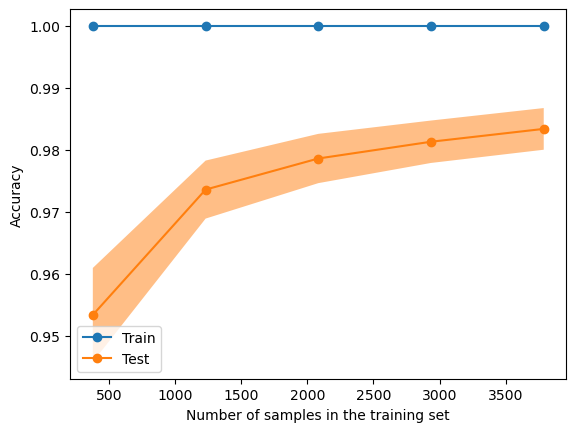

In [24]:
common_params = {
    "X": x,
    "y": y,
    "train_sizes":np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size = 0.32, random_state = seed),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw":{"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}
LearningCurveDisplay.from_estimator(model, **common_params)
plt.show()

ROC曲线：

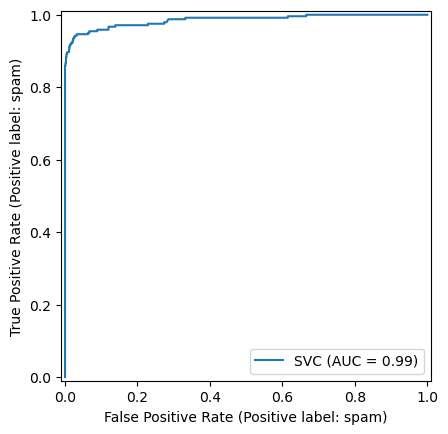

In [26]:
model_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()